In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint, cumtrapz

# D = 42.7 mm
# mass = 45.9 g
# air density, rho = 1. kg/m^3

rho = 1. # kg/m^3
mass = 45.9e-3
A = np.pi*(42.7e-3/2)**2
drag_coefficient = 0.5*rho*A/mass

def calc_drag_force(velocity_vector, t, drag_coefficient=drag_coefficient):
    
    vx, vy = velocity_vector
    velocity_magnitude = np.sqrt(vx*vx + vy*vy)
    
    drag_force_magnitude = drag_coefficient*velocity_magnitude

    vx_hat = 0.
    vy_hat = 0.
   
    if(velocity_vector[0] != 0.):
        vx_hat = vx/velocity_magnitude
    if(velocity_vector[1] != 0.):
        vy_hat = vy/velocity_magnitude

    return np.array([-vx_hat*drag_force_magnitude, -vy_hat*drag_force_magnitude])

def calc_gravitational_force(velocity_vector, t, g=9.82):   
    return np.array([0., -g])

def calc_net_force(velocity_vector, t, drag_coefficient=drag_coefficient, g=9.82):
    gravitational_force = calc_gravitational_force(velocity_vector, t, g=g)
    drag_force = calc_drag_force(velocity_vector, t, drag_coefficient=drag_coefficient)
    
    return drag_force + gravitational_force

t = np.linspace(0., 10., 1000)
v0_vector = np.ones(2)
print(calc_drag_force(v0_vector, t))

[-0.01559922 -0.01559922]


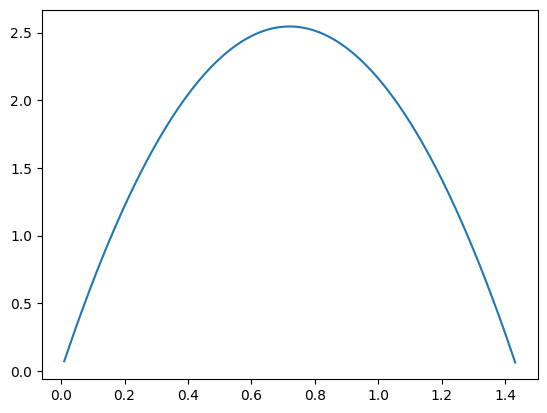

In [2]:
t = np.linspace(0., 10., 1000)
# launch_angle = 45.*np.pi/180. # degrees to radians
launch_angle = 45.*np.pi/180. # degrees to radians
v0_magnitude = 10. # m/s
v0_vector = np.array([v0_magnitude*np.cos(launch_angle), v0_magnitude*np.sin(launch_angle)])

res = odeint(calc_gravitational_force, v0_vector, t)

vx = res[:,0]
vy = res[:,1]

# plt.plot(t, vx)
# plt.plot(t, vy)

x = cumtrapz(vx, t)
y = cumtrapz(vy, t)

ind = y >= 0.
t = t[1:][ind]
x = x[ind]
y = y[ind]
vx = vx[1:][ind]
vy = vy[1:][ind]

plt.plot(t, y)
# plt.plot(vy, y)

# plt.plot(t, vy)
# plt.plot(x, y)

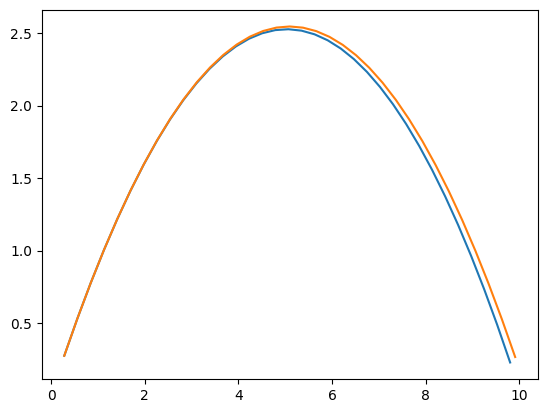

In [3]:
t = np.linspace(0., 40., 1000)
launch_angle = 45.*np.pi/180. # degrees to radians
v0_magnitude = 10. # m/s
v0_vector = np.array([v0_magnitude*np.cos(launch_angle), v0_magnitude*np.sin(launch_angle)])

### Drag ###
res_drag = odeint(calc_net_force, v0_vector, t)
vx_drag = res_drag[:,0]
vy_drag = res_drag[:,1]
x_drag = cumtrapz(vx_drag, t)
y_drag = cumtrapz(vy_drag, t)
ind = y_drag > 0.
x_drag = x_drag[ind]
y_drag = y_drag[ind]
vx_drag = vx_drag[1:][ind]
vy_drag = vy_drag[1:][ind]

plt.plot(x_drag, y_drag)

### No Drag ###
res_no_drag = odeint(calc_gravitational_force, v0_vector, t)
vx_no_drag = res_no_drag[:,0]
vy_no_drag = res_no_drag[:,1]
x_no_drag = cumtrapz(vx_no_drag, t)
y_no_drag = cumtrapz(vy_no_drag, t)
ind = y_no_drag > 0.
x_no_drag = x_no_drag[ind]
y_no_drag = y_no_drag[ind]
vx_no_drag = vx_no_drag[1:][ind]
vy_no_drag = vy_no_drag[1:][ind]

plt.plot(x_no_drag, y_no_drag)

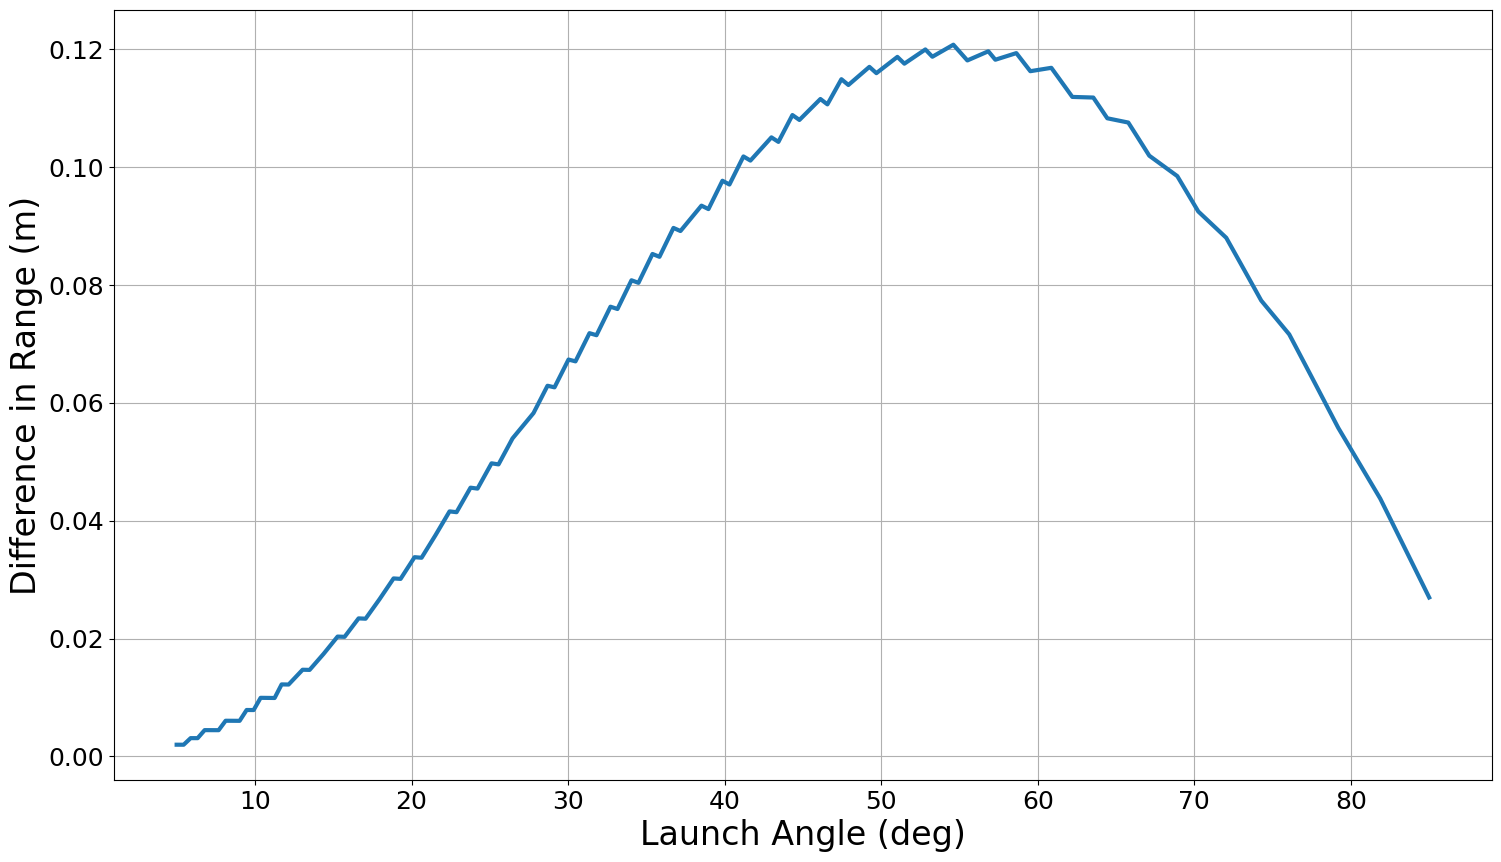

In [7]:
def calc_delta_range(launch_angle):
    t = np.linspace(0., 40., 1000)
    v0_magnitude = 10. # m/s
    v0_vector = np.array([v0_magnitude*np.cos(launch_angle), v0_magnitude*np.sin(launch_angle)])

    try:
        ### Drag ###
        res_drag = odeint(calc_net_force, v0_vector, t)
        vx_drag = res_drag[:,0]
        vy_drag = res_drag[:,1]
        x_drag = cumtrapz(vx_drag, t)
        y_drag = cumtrapz(vy_drag, t)
        ind = y_drag > 0.
        x_drag = x_drag[ind]
        y_drag = y_drag[ind]
        vx_drag = vx_drag[1:][ind]
        vy_drag = vy_drag[1:][ind]

        ### No Drag ###
        res_no_drag = odeint(calc_gravitational_force, v0_vector, t)
        vx_no_drag = res_no_drag[:,0]
        vy_no_drag = res_no_drag[:,1]
        x_no_drag = cumtrapz(vx_no_drag, t)
        y_no_drag = cumtrapz(vy_no_drag, t)
        ind = y_no_drag > 0.
        x_no_drag = x_no_drag[ind]
        y_no_drag = y_no_drag[ind]
        vx_no_drag = vx_no_drag[1:][ind]
        vy_no_drag = vy_no_drag[1:][ind]

        Delta_R = np.nanmax(x_no_drag) - np.nanmax(x_drag)
        return Delta_R
    except:
        return None
    
vectorized_calc_delta_range = np.vectorize(calc_delta_range)

launch_angles = np.linspace(5., 85., 180)*np.pi/180.
delta_ranges = vectorized_calc_delta_range(launch_angles)

# Weird numerical instablity
delta = np.append(0, np.abs(delta_ranges[1:] - delta_ranges[:-1]))
ind = delta < 0.0025
launch_angles = launch_angles[ind]
delta_ranges = delta_ranges[ind]

plt.figure(figsize=(10*16./9, 10))

plt.plot(launch_angles*180./np.pi, delta_ranges, lw=3)
plt.xlabel("Launch Angle (deg)", fontsize=24)
plt.ylabel("Difference in Range (m)", fontsize=24)
plt.tick_params(labelsize=18)
plt.grid()